<h1>KNN + MLflow</h3>

In [96]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import warnings

warnings.filterwarnings('ignore') 

<h3>1. Entrando com os Dados</h3>

In [97]:
data = pd.read_csv('storage/processed/dados_mean.csv', sep=',')

data

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,leads_score_midia_75,...,leads_evento_quinta,leads_opercao_locacao,leads_finalidade_residencial,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
0,72.04,157.91,79.0,615.0,13893.17,10104.560000,4612.0,6446.0,13209.0,17174.0,...,7.0,18.0,20.0,9.0,6.0,1.0,9.0,24.0,1754.0,17.0
1,147.45,462.86,17.0,1542.0,11569.33,17968.080000,841.0,841.0,1554.0,32313.0,...,2.0,0.0,6.0,4.0,1.0,1.0,8.0,11.0,1643.0,17.0
2,8.60,9.71,13.0,23.0,20898.67,10081.940000,13209.0,13209.0,17174.0,32313.0,...,1.0,4.0,0.0,1.0,3.0,1.0,4.0,5.0,63.0,17.0
3,172.20,295.97,273.0,912.0,8651.17,5820.760000,1554.0,4612.0,9605.0,13209.0,...,3.0,0.0,8.0,3.0,2.0,1.0,5.0,10.0,1742.0,17.0
4,0.67,1.15,2.0,2.0,32313.00,9489.073329,32313.0,32313.0,32313.0,32313.0,...,0.0,3.0,3.0,1.0,2.0,1.0,1.0,3.0,19.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24.73,51.22,14.0,161.0,13794.75,14111.860000,1554.0,4138.0,17174.0,32313.0,...,3.0,0.0,10.0,0.0,8.0,1.0,4.0,11.0,294.0,18.0
4996,137.62,235.68,143.0,606.0,10498.88,10580.470000,517.0,4612.0,9845.0,17174.0,...,5.0,9.0,8.0,2.0,4.0,2.0,6.0,13.0,1810.0,18.0
4997,134.33,178.59,337.0,337.0,9524.33,7814.940000,1554.0,1554.0,9845.0,17174.0,...,1.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,422.0,18.0
4998,2.19,4.42,3.0,17.0,11665.00,6421.750000,4612.0,4612.0,13209.0,17174.0,...,1.0,14.0,16.0,5.0,8.0,1.0,10.0,16.0,56.0,18.0


<h3>2. Padronização  das Variáveis</h3>

In [98]:
scaler = StandardScaler()

dados_padronizados = scaler.fit_transform(data)

dados_padronizados = pd.DataFrame(dados_padronizados)

dados_padronizados

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.181652,-0.177487,-0.279661,-0.013228,0.291592,0.155749,-0.188173,-0.091067,0.098615,0.040614,...,0.090744,0.193494,0.031327,0.007287,0.102376,-0.015456,0.072649,0.007986,0.181916,-1.518841
1,0.090382,0.239893,-0.408850,0.232466,-0.013996,2.145612,-0.644735,-0.791049,-1.185797,1.493769,...,-0.028324,-0.065199,-0.019373,-0.009758,-0.116432,-0.015456,0.047810,-0.017879,0.155194,-1.518841
2,-0.410506,-0.380325,-0.417184,-0.170133,1.212822,0.150025,0.852681,0.753532,0.535568,1.493769,...,-0.052138,-0.007712,-0.041102,-0.019984,-0.028909,-0.015456,-0.051546,-0.029817,-0.225161,-1.518841
3,0.179665,0.011474,0.124575,0.065489,-0.397737,-0.928267,-0.558411,-0.320106,-0.298555,-0.339976,...,-0.004510,-0.065199,-0.012130,-0.013167,-0.072670,-0.015456,-0.026707,-0.019869,0.179027,-1.518841
4,-0.439112,-0.392041,-0.440105,-0.175698,2.713818,0.000000,3.165639,3.139340,2.203926,1.493769,...,-0.075951,-0.022084,-0.030238,-0.019984,-0.072670,-0.015456,-0.126062,-0.033796,-0.235753,-1.518841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.352318,-0.323511,-0.415101,-0.133557,0.278649,1.169796,-0.558411,-0.379302,0.535568,1.493769,...,-0.004510,-0.065199,-0.004888,-0.023393,0.189899,-0.015456,-0.051546,-0.017879,-0.169552,0.658397
4996,0.054921,-0.071044,-0.146305,-0.015613,-0.154761,0.276178,-0.683963,-0.320106,-0.272107,0.040614,...,0.043117,0.064147,-0.012130,-0.016575,0.014853,1.415625,-0.001868,-0.013900,0.195396,0.658397
4997,0.043053,-0.149182,0.257931,-0.086910,-0.282915,-0.423639,-0.558411,-0.702006,-0.272107,0.040614,...,-0.052138,-0.065199,-0.033859,-0.023393,-0.160193,-0.015456,-0.076384,-0.033796,-0.138738,0.658397
4998,-0.433629,-0.387566,-0.438021,-0.171723,-0.001415,-0.776186,-0.188173,-0.320106,0.098615,0.040614,...,-0.052138,0.136006,0.016841,-0.006349,0.189899,-0.015456,0.097487,-0.007931,-0.226846,0.658397


<h3>3. Ajustamento do Modelo</h3>

In [99]:
n_neighbors = 10
algoritmo = 'ball_tree'

nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm=algoritmo)

nbrs.fit(dados_padronizados)

distancias, indices = nbrs.kneighbors(dados_padronizados)

<h3>4. Criação de Um Score de Similaridade</h3>

In [100]:
score_similaridade = np.mean(distancias, axis=1)

score_similaridade = pd.DataFrame(score_similaridade)

In [101]:
# Normalizando os scores para o intervalo de 0 a 100 (Conforme Pedido na Tarefa)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,100))
scores_normalizados = scaler.fit_transform(score_similaridade)

# Adicionando os scores ao DataFrame
data['score_similaridade'] = scores_normalizados

<h3>5. Visualização dos Resultados</h3>

In [102]:
data

,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,leads_score_midia_75,...,leads_opercao_locacao,leads_finalidade_residencial,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj,score_similaridade
0,72.04,157.91,79.0,615.0,13893.17,10104.560000,4612.0,6446.0,13209.0,17174.0,...,18.0,20.0,9.0,6.0,1.0,9.0,24.0,1754.0,17.0,0.491228
1,147.45,462.86,17.0,1542.0,11569.33,17968.080000,841.0,841.0,1554.0,32313.0,...,0.0,6.0,4.0,1.0,1.0,8.0,11.0,1643.0,17.0,1.050306
2,8.60,9.71,13.0,23.0,20898.67,10081.940000,13209.0,13209.0,17174.0,32313.0,...,4.0,0.0,1.0,3.0,1.0,4.0,5.0,63.0,17.0,1.167555
3,172.20,295.97,273.0,912.0,8651.17,5820.760000,1554.0,4612.0,9605.0,13209.0,...,0.0,8.0,3.0,2.0,1.0,5.0,10.0,1742.0,17.0,1.039916
4,0.67,1.15,2.0,2.0,32313.00,9489.073329,32313.0,32313.0,32313.0,32313.0,...,3.0,3.0,1.0,2.0,1.0,1.0,3.0,19.0,17.0,0.297766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24.73,51.22,14.0,161.0,13794.75,14111.860000,1554.0,4138.0,17174.0,32313.0,...,0.0,10.0,0.0,8.0,1.0,4.0,11.0,294.0,18.0,0.624399
4996,137.62,235.68,143.0,606.0,10498.88,10580.470000,517.0,4612.0,9845.0,17174.0,...,9.0,8.0,2.0,4.0,2.0,6.0,13.0,1810.0,18.0,0.848115
4997,134.33,178.59,337.0,337.0,9524.33,7814.940000,1554.0,1554.0,9845.0,17174.0,...,0.0,2.0,0.0,0.0,1.0,3.0,3.0,422.0,18.0,0.595100
4998,2.19,4.42,3.0,17.0,11665.00,6421.750000,4612.0,4612.0,13209.0,17174.0,...,14.0,16.0,5.0,8.0,1.0,10.0,16.0,56.0,18.0,0.471946


In [103]:
data['score_similaridade'].describe()

count    5000.000000
mean        0.913199
std         3.176171
min         0.000000
25%         0.421872
50%         0.650662
75%         0.898903
max       100.000000
Name: score_similaridade, dtype: float64

<Axes: ylabel='Density'>

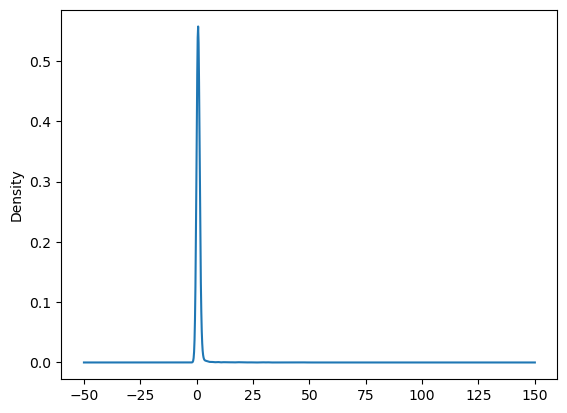

In [104]:
data['score_similaridade'].plot(kind='kde')

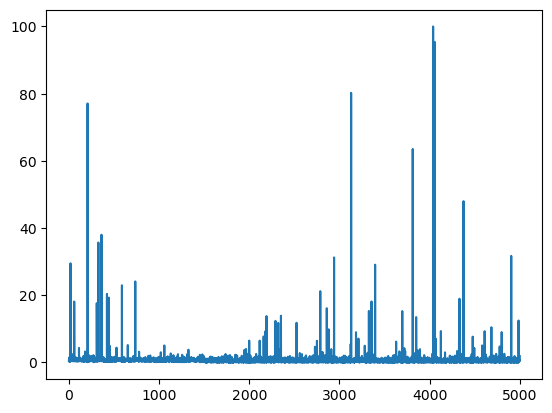

In [105]:
plt.plot(data['score_similaridade'])

In [106]:
pd.DataFrame(data['score_similaridade'].describe()).T

,count,mean,std,min,25%,50%,75%,max
score_similaridade,5000.0,0.913199,3.176171,0.0,0.421872,0.650662,0.898903,100.0
